In [1]:
# 1. Import Required Libraries

# Data manipulation and analysis
import pandas as pd                    # For loading and handling datasets
import numpy as np                     # For numerical operations and array handling

# Data visualization
import matplotlib.pyplot as plt        # For basic plotting
import seaborn as sns                  # For advanced and styled visualizations

# Preprocessing
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Model building
from sklearn.linear_model import LogisticRegression  # For logistic regression model

# Model evaluation
from sklearn.model_selection import train_test_split        # For splitting data into training and testing sets
from sklearn.metrics import classification_report           # For detailed classification metrics
from sklearn.metrics import confusion_matrix                # For computing confusion matrix
from sklearn.metrics import accuracy_score                  # For calculating prediction accuracy
from sklearn.metrics import roc_curve, roc_auc_score        # For ROC curve and AUC score evaluation

In [2]:
# 2. Load the Dataset

# Read the dataset from the given CSV file path and store it in a pandas DataFrame
df = pd.read_csv("../input/data.csv")

In [3]:
# 3. Check Data Types

# Display the data type of each column in the dataset
# This helps identify numerical, categorical, or object-type features
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
# 4. Inspect Unnamed Column Values

# Print the unique values in the 'Unnamed: 32' column
# This helps check whether the column contains only NaN or irrelevant data
print(df["Unnamed: 32"].unique())

[nan]


In [5]:
# 5. Clean the Data and Remove Unnecessary Columns

# Drop the 'id' and 'Unnamed: 32' columns from the DataFrame
# 'id' is just an identifier and not useful for prediction
# 'Unnamed: 32' contains only NaN values and adds no value
# 'inplace=True' applies the change directly to the original DataFrame
# 'errors="ignore"' prevents errors if one of the columns is not found
df.drop(columns=["id", "Unnamed: 32"], inplace=True, errors="ignore")

In [6]:
# 6. Encode the Target Variable

# Convert the 'diagnosis' column from categorical to numerical:
# 'M' (Malignant) becomes 1, and 'B' (Benign) becomes 0
# This encoding is necessary for training the machine learning model
df["diagnosis"] = df["diagnosis"].map({'M': 1, 'B': 0})

In [7]:
# Display the first 5 rows of the dataframe
df.head() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Display the last 5 rows of the dataframe
df.tail() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [9]:
# 5. Define Features and Target

# Features: All columns except the target variable ('diagnosis')
X = df.drop("diagnosis", axis=1)  # Removes the 'diagnosis' column from the dataframe, keeping all other columns as features (independent variables)

# Target: The column representing the target variable ('diagnosis')
y = df["diagnosis"]  # Selects the 'diagnosis' column as the target variable (dependent variable)

In [10]:
# 6. Normalize Features

# Create an instance of the StandardScaler to standardize the features
scaler = StandardScaler()  # StandardScaler standardizes the features by removing the mean and scaling to unit variance.

# Apply the scaler to the features (X) and transform them
X_scaled = scaler.fit_transform(X)  # Fits the scaler to the features (X) and transforms them into standardized values

In [11]:
# 7. Split the Data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  
# 'X_scaled' (features) and 'y' (target) are split into training and testing sets
# 'test_size=0.2' means 20% of the data will be used for testing and 80% for training
# 'random_state=42' ensures reproducibility of the split by setting a fixed seed for randomness

In [12]:
# 8. Train the Logistic Regression Model

# Initialize the Logistic Regression model with specified parameters
model = LogisticRegression(max_iter=10000, class_weight='balanced')  
# 'max_iter=10000' increases the maximum number of iterations to 10,000 to ensure the model converges during training
# 'class_weight='balanced'' adjusts weights inversely proportional to class frequencies to handle imbalanced datasets

# Train the model using the training data (X_train and y_train)
model.fit(X_train, y_train)  # Fits the Logistic Regression model to the training data (features and target)

LogisticRegression(class_weight='balanced', max_iter=10000)

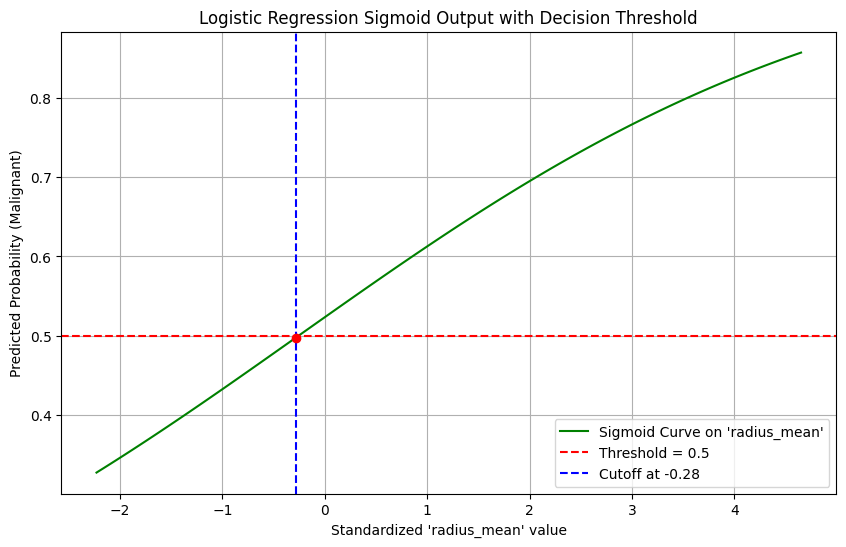

In [13]:
# 9. Visualize the Sigmoid Curve on One Feature (e.g., 'mean radius') with a Threshold

# Set the classification threshold (commonly 0.5)
threshold = 0.5

# Select the feature index and get the feature name
feature_index = 1  # For example: 1 corresponds to 'mean radius'
feature_name = df.columns[feature_index]  # Get the actual column name

# Generate a range of standardized values for the selected feature
z = np.linspace(X_scaled[:, feature_index].min(), X_scaled[:, feature_index].max(), 100)
# 'z' contains 100 evenly spaced values between min and max of the standardized selected feature

# Create a dummy input array (100 samples, all features zeroed out)
X_dummy = np.zeros((100, X.shape[1]))
# This simulates 100 samples where all features are set to 0 (i.e., their mean after standardization)

# Replace only the selected feature column with the values in 'z'
X_dummy[:, feature_index] = z
# This isolates the effect of the selected feature while keeping all others constant

# Predict the probability of class 1 (Malignant) using the logistic regression model
probabilities = model.predict_proba(X_dummy)[:, 1]
# 'predict_proba' returns [P(class 0), P(class 1)], we take only P(class 1)

# Find the point where the predicted probability crosses the threshold
threshold_index = np.argmin(np.abs(probabilities - threshold))  # Find the closest index
cut_value = z[threshold_index]           # Value of the feature at that index
cut_prob = probabilities[threshold_index]  # Probability at the threshold cut

# --- Plotting the Sigmoid Curve and the Threshold Line ---

plt.figure(figsize=(10, 6))  # Set figure size

# Plot the sigmoid curve (P(class 1) vs standardized feature)
plt.plot(z, probabilities, label=f"Sigmoid Curve on '{feature_name}'", color='green')

# Plot horizontal threshold line (e.g., y = 0.5)
plt.axhline(y=threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")

# Plot vertical line at the cut value (feature value that hits the threshold)
plt.axvline(x=cut_value, color='blue', linestyle='--', label=f"Cutoff at {cut_value:.2f}")

# Mark the exact point of intersection
plt.plot(cut_value, cut_prob, 'ro')  # red dot

# Add plot title and axis labels
plt.title("Logistic Regression Sigmoid Output with Decision Threshold")
plt.xlabel(f"Standardized '{feature_name}' value")
plt.ylabel("Predicted Probability (Malignant)")

# Add grid and legend for clarity
plt.grid(True)
plt.legend()

# Show the final plot
plt.show()

In [14]:
# 7. Make Predictions

# Use the trained logistic regression model to predict the class labels on the test data
y_pred = model.predict(X_test)  
# 'predict' returns binary class predictions:
# - 1 for Malignant
# - 0 for Benign
# The predictions are made based on the learned decision boundary from training

# 8. Evaluate the Model

# Print the overall accuracy of the model on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))  
# 'accuracy_score' computes the ratio of correct predictions to total predictions

# Print the confusion matrix to understand prediction breakdown
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))  
# The confusion matrix shows:
# - True Negatives (TN)
# - False Positives (FP)
# - False Negatives (FN)
# - True Positives (TP)

# Print precision, recall, f1-score, and support for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))  
# This report includes:
# - Precision: Correct positive predictions out of all predicted positives
# - Recall: Correct positive predictions out of all actual positives
# - F1-score: Harmonic mean of precision and recall
# - Support: Number of actual instances for each class

Accuracy: 0.9824561403508771

Confusion Matrix:
 [[70  1]
 [ 1 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



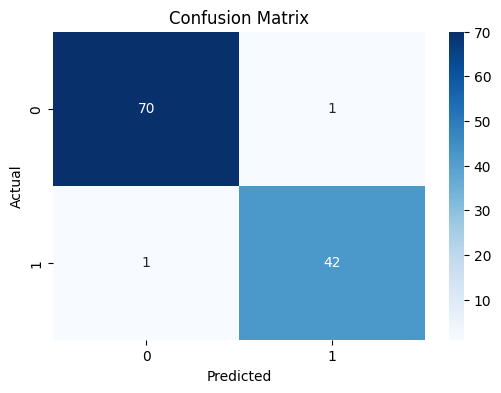

In [15]:
# Visualize the confusion matrix using a heatmap

# Create a new figure with specified size
plt.figure(figsize=(6,4))  
# This sets the size of the plot to 6 inches wide and 4 inches tall

# Create a heatmap of the confusion matrix with annotations
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')  
# 'confusion_matrix(y_test, y_pred)' computes the confusion matrix
# 'annot=True' displays the numbers inside the cells
# 'fmt="d"' formats the annotations as integers
# 'cmap="Blues"' sets the color theme of the heatmap to blue shades

# Set the title of the plot
plt.title("Confusion Matrix")  

# Label the x-axis as "Predicted"
plt.xlabel("Predicted")  

# Label the y-axis as "Actual"
plt.ylabel("Actual")  

# Show the plot
plt.show()  

In [16]:
# Get the predicted probabilities

# Predict the probability that each test sample belongs to the positive class (Malignant)
y_proba = model.predict_proba(X_test)[:, 1]  
# 'predict_proba' returns an array with two columns:
# - [:, 0] is the probability for class 0 (Benign)
# - [:, 1] is the probability for class 1 (Malignant)
# We select only column 1 to get the probability of malignancy
# Compute ROC curve values

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and decision thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)  
# 'y_test' contains the true class labels
# 'y_proba' contains the predicted probabilities for the positive class (Malignant)
# 'roc_curve' computes:
# - fpr: proportion of actual negatives incorrectly classified as positives
# - tpr: proportion of actual positives correctly classified
# - thresholds: decision boundary values used to compute fpr and tpr at different points

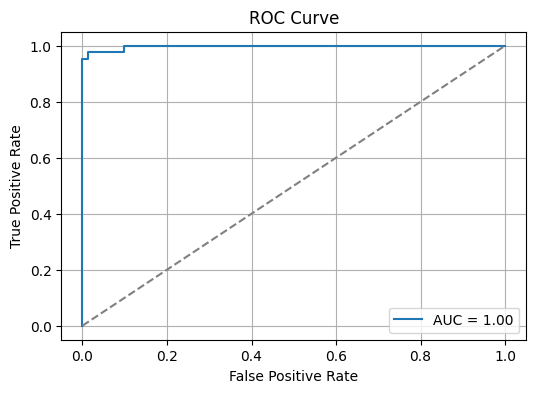

In [17]:
# Plot the ROC Curve

# Create a new figure with defined size
plt.figure(figsize=(6,4))  
# Sets the plot size to 6 inches wide by 4 inches tall

# Plot the ROC curve (TPR vs. FPR) with the AUC score in the label
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')  
# 'fpr' and 'tpr' define the ROC curve
# 'roc_auc_score' computes the area under the ROC curve (AUC)
# The AUC score is added to the plot legend for reference

# Plot a diagonal reference line (baseline for a random model)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
# This is the "no-skill" line: an AUC of 0.5 (random guessing)

# Label the x-axis as "False Positive Rate"
plt.xlabel('False Positive Rate')  

# Label the y-axis as "True Positive Rate"
plt.ylabel('True Positive Rate')  

# Set the title of the plot
plt.title('ROC Curve')  

# Display the legend (which includes the AUC score)
plt.legend()  

# Add a grid for better readability
plt.grid()  

# Display the plot
plt.show()  